
## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

file_path = r"C:\Users\USER\Downloads\ExtraaLearn.csv"
learn = pd.read_csv(file_path)
data = learn.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
data.head()
print(learn.head())

# Get an overview of the dataset
print(learn.info())

# Summary statistics of the dataset
print(learn.describe())
# Check for missing values
print(learn.isnull().sum())

# Check for duplicate rows
print("Duplicate Rows:", learn.duplicated().sum())

# Check unique values in categorical columns
for column in learn.select_dtypes(include=['object']).columns:
    print(column, ":", learn[column].unique())
data.shape

       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639               1.86100   
1               2                     83               0.32000   
2               3                    330               0.07400   
3               4                    464               2.05700   
4               4                    600              16.91400   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

(4612, 15)

## Data Preprocessing

- Missing value treatment 
- Feature engineering 
- Outlier detection and treatment 
- Preparing data for modeling 
- Any other preprocessing steps 

In [27]:
# Handle missing values
missing_values = learn.isnull().sum()
print(missing_values)

# Numeric columns for outlier detection
numeric_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

for column in numeric_columns:
    # Calculate IQR for the column
    q1 = learn[column].quantile(0.25)
    q3 = learn[column].quantile(0.75)
    iqr = q3 - q1

    # Calculate lower and upper bounds for potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers in the column
    outliers = learn[(learn[column] < lower_bound) | (learn[column] > upper_bound)]

    # Print the identified outliers
    print(f"Identified Outliers in {column}:")
    print(outliers)

    # Cap outliers in the column
    learn[column] = np.where(learn[column] < lower_bound, lower_bound, np.where(learn[column] > upper_bound, upper_bound, learn[column]))
    
    X = data.drop(["status"], axis=1)
Y = data["status"] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64
Identified Outliers in age:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []
Identified Outliers in website_visits:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels,

## EDA


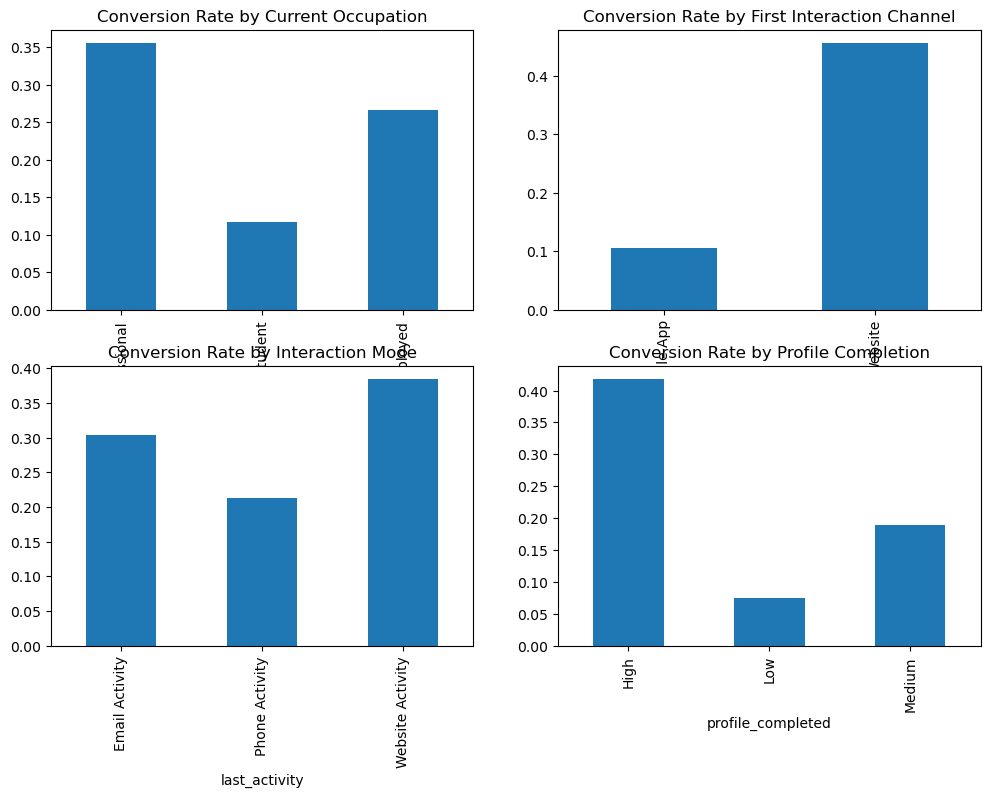

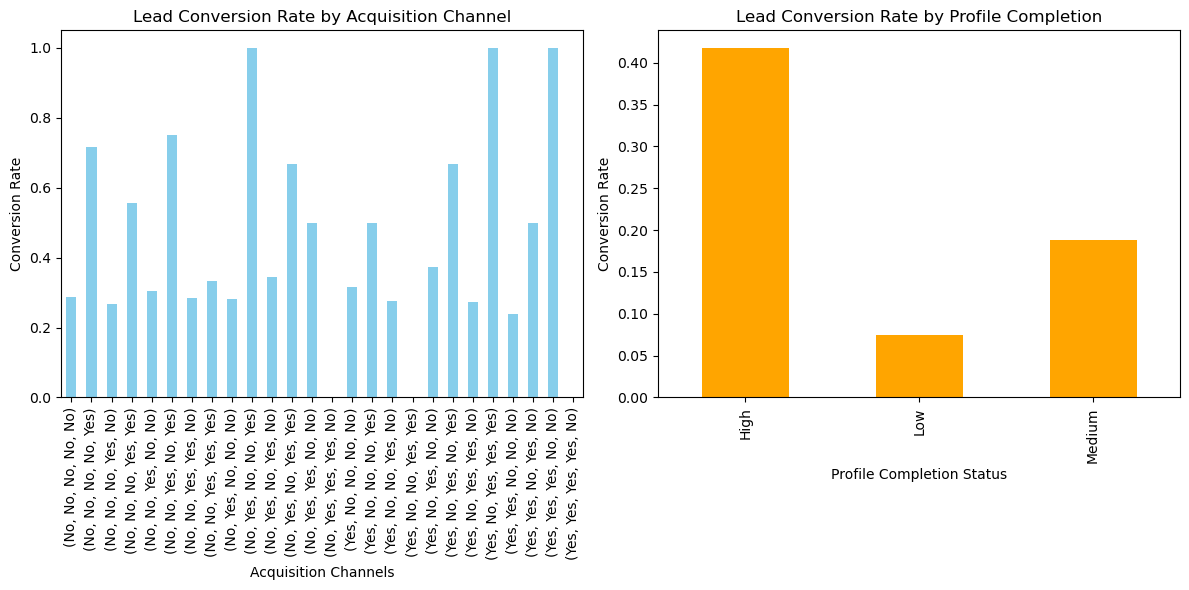

In [25]:
# Calculate conversion rates
occupation_conversion = data.groupby('current_occupation')['status'].mean()
interaction_conversion = data.groupby('first_interaction')['status'].mean()
mode_conversion = data.groupby('last_activity')['status'].mean()  
profile_completion_conversion = data.groupby('profile_completed')['status'].mean()

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
occupation_conversion.plot(kind='bar')
plt.title('Conversion Rate by Current Occupation')

plt.subplot(2, 2, 2)
interaction_conversion.plot(kind='bar')
plt.title('Conversion Rate by First Interaction Channel')

plt.subplot(2, 2, 3)
mode_conversion.plot(kind='bar')
plt.title('Conversion Rate by Interaction Mode')

plt.subplot(2, 2, 4)
profile_completion_conversion.plot(kind='bar')
plt.title('Conversion Rate by Profile Completion')

channel_conversion = data.groupby(['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral'])['status'].mean()

# Calculate conversion rate based on profile completion status
profile_completion_conversion = data.groupby('profile_completed')['status'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Conversion rate by lead acquisition channels
plt.subplot(1, 2, 1)
channel_conversion.plot(kind='bar', color='skyblue')
plt.title('Lead Conversion Rate by Acquisition Channel')
plt.xlabel('Acquisition Channels')
plt.ylabel('Conversion Rate')

# Conversion rate based on profile completion status
plt.subplot(1, 2, 2)
profile_completion_conversion.plot(kind='bar', color='orange')
plt.title('Lead Conversion Rate by Profile Completion')
plt.xlabel('Profile Completion Status')
plt.ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

##  Decision Tree model

In [29]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()
    # Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier()

d_tree.fit(X_train, y_train)

DecisionTreeClassifier()